## Pandas与匿名函数

### Python与匿名函数

In [82]:
data = {"Jack": 182, "Tom":176, "Jerry":179, "Emily":165, "Sawyer":170, "Chris":160}

字典**items()**方法,返回可遍历的(键, 值) 元组数组

In [83]:
data.items()

dict_items([('Jack', 182), ('Tom', 176), ('Jerry', 179), ('Emily', 165), ('Sawyer', 170), ('Chris', 160)])

**sorted()**方法,key=lambda x: x[1] 为对前面的对象中的第二维数据（即value）的值进行排序。 key=lambda  变量：变量[维数]

In [84]:
# 按照字典的value值，逆序排序
data_rev = sorted(data.items(), key=lambda x:x[1], reverse=True)
dict(data_rev)

{'Jack': 182,
 'Jerry': 179,
 'Tom': 176,
 'Sawyer': 170,
 'Emily': 165,
 'Chris': 160}

In [85]:
# 按照字典的key值，自然顺序排序
data_nrev = sorted(data.items(), key=lambda x:x[0], reverse=False)
dict(data_nrev)

{'Chris': 160,
 'Emily': 165,
 'Jack': 182,
 'Jerry': 179,
 'Sawyer': 170,
 'Tom': 176}

所谓的**函数式编程**，是指一种高度抽象的编程范式，即可以把函数作为参数传入，而能够接收函数作为参数传入的函数我们称之为高阶函数。常见的高阶函数有<font color=red>map、reduce和filter</font>等。  
**map()**----第一个参数 function 以参数序列中的每一个元素调用 function 函数，返回包含每次 function 函数返回值的新列表。   
**reduce()**----函数会对参数序列中元素进行累积。函数将一个数据集合（链表，元组等）中的所有数据进行下列操作：用传给 reduce 中的函数 function（有两个参数）先对集合中的第 1、2 个元素进行操作，得到的结果再与第三个数据用 function 函数运算，最后得到一个结果。    
**filter()**----函数用于过滤序列，过滤掉不符合条件的元素，返回由符合条件元素组成的新列表。
该接收两个参数，第一个为函数，第二个为序列，序列的每个元素作为参数传递给函数进行判断，然后返回 True 或 False，最后将返回 True 的元素放到新列表中。

In [86]:
names = ["Larissa", "ivy", "LUCY", "aBBY", "martion", "allen"]

In [87]:
list(map(lambda x: x[0].upper()+x[1:].lower(), names))

['Larissa', 'Ivy', 'Lucy', 'Abby', 'Martion', 'Allen']

### Pandas与函数

#### map()函数

In [88]:
file = r"C:\Users\16526\Desktop\电网项目\dataset\chapter 3\3-5 GDP.csv"

In [89]:
df_GDP = pd.read_csv(file, header=0)

In [90]:
df_GDP

,Country Name,longitude,latitude,1960,1961,1962,1963,1964,1965,1966,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,United Kingdom,-0.07858,51.50476,7.232805e+10,7.669436e+10,8.060194e+10,8.544377e+10,9.338760e+10,1.010000e+11,1.070000e+11,...,2390000000000,2450000000000,2630000000000,2680000000000,2750000000000,3030000000000,2900000000000,2660000000000,2640000000000,2830000000000
1,United States,-77.04026,38.85169,5.430000e+11,5.630000e+11,6.050000e+11,6.390000e+11,6.860000e+11,7.440000e+11,8.150000e+11,...,14400000000000,15000000000000,15500000000000,16200000000000,16800000000000,17500000000000,18200000000000,18700000000000,19500000000000,20500000000000
2,Russian Federation,37.59411,55.75306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1220000000000,1520000000000,2050000000000,2210000000000,2300000000000,2060000000000,1360000000000,1280000000000,1580000000000,1660000000000
3,France,2.29363,48.87372,6.265147e+10,6.834674e+10,7.631378e+10,8.555111e+10,9.490659e+10,1.020000e+11,1.110000e+11,...,2690000000000,2640000000000,2860000000000,2680000000000,2810000000000,2850000000000,2440000000000,2470000000000,2590000000000,2780000000000
4,China,116.39213,39.90071,5.971647e+10,5.005687e+10,4.720936e+10,5.070680e+10,5.970834e+10,7.043627e+10,7.672029e+10,...,5100000000000,6090000000000,7550000000000,8530000000000,9570000000000,10400000000000,11000000000000,11100000000000,12100000000000,13600000000000


In [91]:
# 英文格式转化成中文
country_dict = {
    "United Kingdom": "英国", 
    "United States": "美国", 
    "Russian Federation": "俄罗斯", 
    "France": "法国", 
    "China": "中国" 
}

**Series.map(self, arg, na_action=None)**   
参数类型为 dict--------Series.map({'cat': 'kitten', 'dog': 'puppy'})  
参数类型为 function----Series.map('I am a {}'.format)   
若不想对NaN值使用参数中的 function ， 参数 na_tion=‘ignore

In [92]:
df_GDP["国家"] = df_GDP["Country Name"].map(country_dict)
df_GDP["国家"]

0     英国
1     美国
2    俄罗斯
3     法国
4     中国
Name: 国家, dtype: object

#### apply()函数

##### 函数与匿名函数

In [93]:
# 定义函数:将数字类型美元计价GDP的变量转换为以万亿人民币为单位计价的数据
def dollar_to_rmb(x):
    if np.isnan(x):
        return np.nan
    else:
        _value = x / 1000000000000 * 6.8918
        return "%.2f万亿人民币"%(_value)
# 利用apply，将函数dollar_to_rmb的功能，作用到"2018"列，进行列方向的计算
df_GDP["2018"].apply(dollar_to_rmb)

0     19.50万亿人民币
1    141.28万亿人民币
2     11.44万亿人民币
3     19.16万亿人民币
4     93.73万亿人民币
Name: 2018, dtype: object

In [94]:
df_GDP["2018"].apply(
    lambda x: x if np.isnan(x) else "%.2f万亿人民币"%(x / 1000000000000 * 6.8918))

0     19.50万亿人民币
1    141.28万亿人民币
2     11.44万亿人民币
3     19.16万亿人民币
4     93.73万亿人民币
Name: 2018, dtype: object

##### apply()函数的运算方向

In [95]:
# 定义了一个计算GDP增长率的匿名函数
df_GDP[["2017", "2018"]].apply(
    lambda x: "%.2f"%((x["2018"]-x["2017"])/x["2017"]*100)+"%", axis=1)

0     7.20%
1     5.13%
2     5.06%
3     7.34%
4    12.40%
dtype: object

##### applymap()函数

In [96]:
df_GDP.loc[:, "1960":"2018"].applymap(
    lambda x: x if np.isnan(x) else "%.2f万亿人民币"%(x / 1000000000000 * 6.8918))

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,0.50万亿人民币,0.53万亿人民币,0.56万亿人民币,0.59万亿人民币,0.64万亿人民币,0.70万亿人民币,0.74万亿人民币,0.76万亿人民币,0.72万亿人民币,0.78万亿人民币,...,16.47万亿人民币,16.88万亿人民币,18.13万亿人民币,18.47万亿人民币,18.95万亿人民币,20.88万亿人民币,19.99万亿人民币,18.33万亿人民币,18.19万亿人民币,19.50万亿人民币
1,3.74万亿人民币,3.88万亿人民币,4.17万亿人民币,4.40万亿人民币,4.73万亿人民币,5.13万亿人民币,5.62万亿人民币,5.94万亿人民币,6.50万亿人民币,7.03万亿人民币,...,99.24万亿人民币,103.38万亿人民币,106.82万亿人民币,111.65万亿人民币,115.78万亿人民币,120.61万亿人民币,125.43万亿人民币,128.88万亿人民币,134.39万亿人民币,141.28万亿人民币
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.41万亿人民币,10.48万亿人民币,14.13万亿人民币,15.23万亿人民币,15.85万亿人民币,14.20万亿人民币,9.37万亿人民币,8.82万亿人民币,10.89万亿人民币,11.44万亿人民币
3,0.43万亿人民币,0.47万亿人民币,0.53万亿人民币,0.59万亿人民币,0.65万亿人民币,0.70万亿人民币,0.76万亿人民币,0.82万亿人民币,0.90万亿人民币,0.97万亿人民币,...,18.54万亿人民币,18.19万亿人民币,19.71万亿人民币,18.47万亿人民币,19.37万亿人民币,19.64万亿人民币,16.82万亿人民币,17.02万亿人民币,17.85万亿人民币,19.16万亿人民币
4,0.41万亿人民币,0.34万亿人民币,0.33万亿人民币,0.35万亿人民币,0.41万亿人民币,0.49万亿人民币,0.53万亿人民币,0.50万亿人民币,0.49万亿人民币,0.55万亿人民币,...,35.15万亿人民币,41.97万亿人民币,52.03万亿人民币,58.79万亿人民币,65.95万亿人民币,71.67万亿人民币,75.81万亿人民币,76.50万亿人民币,83.39万亿人民币,93.73万亿人民币


##### 清洗与效率

## Pandas:数据清洗常用方法

In [97]:
file = r"C:\Users\16526\Desktop\电网项目\dataset\chapter 3\3-6 jobs_51_info.csv"
jobs = pd.read_csv(file, header=0)
jobs.head()

,job,company,city,salary_min,salary_max
0,金融数据分析师/助理,华壹信融投资管理（北京）有限责任...,北京,8333.33,12500.0
1,a（0经验可培养）金融数据分析师/助理,深圳市中创荣投资有限公司,深圳,8000.00,10000.0
2,初级运营数据分析专员 助理,知才（上海）信息技术有限公司,上海,6000.00,8000.0
3,销售数据分析,上海品星互联网信息技术有限公司,北京,5000.00,9000.0
4,数据分析经理,美菜网,上海,13000.00,17000.0


In [98]:
# 字段信息总览
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66766 entries, 0 to 66765
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   job         66766 non-null  object 
 1   company     66766 non-null  object 
 2   city        64290 non-null  object 
 3   salary_min  65457 non-null  float64
 4   salary_max  65462 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [99]:
# 查看数据包含哪些城市
jobs["city"].unique()

array(['北京', '深圳', '上海', '武汉', '广州', '南京', '西安', '杭州', '成都', '苏州', nan],
      dtype=object)

### 筛选与过滤

**isin()、isnull()、notnull()**

In [100]:
# skipna : 布尔值,默认为True.表示跳过NaN值.如果整行/列都是NaN,那么结果也就是NaN
jobs[jobs["city"] == "北京"]["salary_min"].mean(skipna=True)

10329.230455194938

### 计算唯一值

**value_counts()**

In [101]:
jobs["city"].value_counts()

广州    15634
深圳    14448
上海    13027
北京     5093
杭州     4615
武汉     3682
成都     2811
南京     2165
苏州     1486
西安     1329
Name: city, dtype: int64

### 空值处理

#### 丢弃空值

In [102]:
jobs.shape

(66766, 5)

**dropna函数**

In [103]:
# 只要这一行存在空值，则删除改行；axis=0用来表征是删除行（运算方向为列方向）
# 同步计算删除结果的维度，为63017行5列。
jobs.dropna(axis=0).shape

(63017, 5)

In [104]:
# 整行均为空值，删除；否则保留
jobs.dropna(how="all", axis=0).shape

(66766, 5)

In [105]:
# 删除指定列("city","salary_min")中包含缺失值的行
jobs.dropna(subset=["city"]).shape

(64290, 5)

#### 空值填充

##### 填充唯一值

填充city字段空值为其他，设置**inplace为True。该语句本身返回值为None，但是jobs本身发生了变化**

In [106]:
jobs["city"].fillna("其他", inplace=True)
jobs["city"].value_counts()

广州    15634
深圳    14448
上海    13027
北京     5093
杭州     4615
武汉     3682
成都     2811
其他     2476
南京     2165
苏州     1486
西安     1329
Name: city, dtype: int64

##### 填充指定值

In [107]:
jobs["salary_min"].fillna(jobs["salary_min"].mean(),inplace=True)

In [108]:
import random
jobs["salary_max"].fillna(random.randint(10000, 200000))

0        12500.0
1        10000.0
2         8000.0
3         9000.0
4        17000.0
          ...   
66761     5000.0
66762    10000.0
66763    30000.0
66764    50000.0
66765    16000.0
Name: salary_max, Length: 66766, dtype: float64

**检查某一列是否有Nan**

In [109]:
jobs["salary_min"].isnull().any()

False

In [110]:
jobs["salary_max"].fillna(method="ffill",inplace=True)

In [111]:
jobs["salary_max"].isnull().any()

False

#### 新增或删除列

##### 末位新增列

##### 中间插入一列

In [112]:
# insert函数至少需要传入3个参数：
# 第一个参数表示插入列的具体位置
# 第二参数表示插入列的列名
# 第三个参数表示插入列的赋值
jobs.insert(1, "data_engineer", jobs["job"].apply(lambda x: "y" if "数据分析" in x else "n"))
jobs

,job,data_engineer,company,city,salary_min,salary_max
0,金融数据分析师/助理,y,华壹信融投资管理（北京）有限责任...,北京,8333.33,12500.0
1,a（0经验可培养）金融数据分析师/助理,y,深圳市中创荣投资有限公司,深圳,8000.00,10000.0
2,初级运营数据分析专员 助理,y,知才（上海）信息技术有限公司,上海,6000.00,8000.0
3,销售数据分析,y,上海品星互联网信息技术有限公司,北京,5000.00,9000.0
4,数据分析经理,y,美菜网,上海,13000.00,17000.0
...,...,...,...,...,...,...
66761,运营支持岗,n,九州通医药集团物流有限公司,武汉,3000.00,5000.0
66762,新媒体运营专员,n,深圳市摩天之星企业管理有限公司龙...,深圳,8000.00,10000.0
66763,电商运营总监,n,福建特家商业管理有限公司,广州,20000.00,30000.0
66764,总经理/CEO,n,福建特家商业管理有限公司,广州,30000.00,50000.0


##### 对列重新排序

In [113]:
# 这里通过重新设置列索引的方式间接实现了排序
jobs.reindex(columns = ['job', 'data_engineer', 'company', 'salary_min', 'salary_max', 'city'])

,job,data_engineer,company,salary_min,salary_max,city
0,金融数据分析师/助理,y,华壹信融投资管理（北京）有限责任...,8333.33,12500.0,北京
1,a（0经验可培养）金融数据分析师/助理,y,深圳市中创荣投资有限公司,8000.00,10000.0,深圳
2,初级运营数据分析专员 助理,y,知才（上海）信息技术有限公司,6000.00,8000.0,上海
3,销售数据分析,y,上海品星互联网信息技术有限公司,5000.00,9000.0,北京
4,数据分析经理,y,美菜网,13000.00,17000.0,上海
...,...,...,...,...,...,...
66761,运营支持岗,n,九州通医药集团物流有限公司,3000.00,5000.0,武汉
66762,新媒体运营专员,n,深圳市摩天之星企业管理有限公司龙...,8000.00,10000.0,深圳
66763,电商运营总监,n,福建特家商业管理有限公司,20000.00,30000.0,广州
66764,总经理/CEO,n,福建特家商业管理有限公司,30000.00,50000.0,广州


##### 删除单列

In [114]:
del jobs["data_engineer"]

In [115]:
jobs

,job,company,city,salary_min,salary_max
0,金融数据分析师/助理,华壹信融投资管理（北京）有限责任...,北京,8333.33,12500.0
1,a（0经验可培养）金融数据分析师/助理,深圳市中创荣投资有限公司,深圳,8000.00,10000.0
2,初级运营数据分析专员 助理,知才（上海）信息技术有限公司,上海,6000.00,8000.0
3,销售数据分析,上海品星互联网信息技术有限公司,北京,5000.00,9000.0
4,数据分析经理,美菜网,上海,13000.00,17000.0
...,...,...,...,...,...
66761,运营支持岗,九州通医药集团物流有限公司,武汉,3000.00,5000.0
66762,新媒体运营专员,深圳市摩天之星企业管理有限公司龙...,深圳,8000.00,10000.0
66763,电商运营总监,福建特家商业管理有限公司,广州,20000.00,30000.0
66764,总经理/CEO,福建特家商业管理有限公司,广州,30000.00,50000.0


##### 删除多列

In [116]:
# 这里用axis=1表示删除列
# inplace默认为False
jobs.drop([0, 1], axis=0)

,job,company,city,salary_min,salary_max
2,初级运营数据分析专员 助理,知才（上海）信息技术有限公司,上海,6000.0,8000.0
3,销售数据分析,上海品星互联网信息技术有限公司,北京,5000.0,9000.0
4,数据分析经理,美菜网,上海,13000.0,17000.0
5,金融大数据分析实习,湖北浩玥智能科教设备有限公司,武汉,3200.0,5000.0
6,数据分析员,广州德伦医疗投资有限公司,广州,4000.0,6000.0
...,...,...,...,...,...
66761,运营支持岗,九州通医药集团物流有限公司,武汉,3000.0,5000.0
66762,新媒体运营专员,深圳市摩天之星企业管理有限公司龙...,深圳,8000.0,10000.0
66763,电商运营总监,福建特家商业管理有限公司,广州,20000.0,30000.0
66764,总经理/CEO,福建特家商业管理有限公司,广州,30000.0,50000.0


#### 排序

##### 对索引的排序

In [117]:
jobs.sort_index(axis=0, ascending=True)

,job,company,city,salary_min,salary_max
0,金融数据分析师/助理,华壹信融投资管理（北京）有限责任...,北京,8333.33,12500.0
1,a（0经验可培养）金融数据分析师/助理,深圳市中创荣投资有限公司,深圳,8000.00,10000.0
2,初级运营数据分析专员 助理,知才（上海）信息技术有限公司,上海,6000.00,8000.0
3,销售数据分析,上海品星互联网信息技术有限公司,北京,5000.00,9000.0
4,数据分析经理,美菜网,上海,13000.00,17000.0
...,...,...,...,...,...
66761,运营支持岗,九州通医药集团物流有限公司,武汉,3000.00,5000.0
66762,新媒体运营专员,深圳市摩天之星企业管理有限公司龙...,深圳,8000.00,10000.0
66763,电商运营总监,福建特家商业管理有限公司,广州,20000.00,30000.0
66764,总经理/CEO,福建特家商业管理有限公司,广州,30000.00,50000.0


##### 对值的排序

In [118]:
jobs.sort_values(by=["city","company"],ascending=[True,False],axis=0)

,job,company,city,salary_min,salary_max
859,数据分析师,（CCE GROUP）上海程迈文化传播有...,上海,15000.0,20000.0
50689,资深媒介专员,（CCE GROUP）上海程迈文化传播有...,上海,6000.0,8000.0
23092,产品运营经理（教育行业）,龙的股份,上海,5000.0,8000.0
4113,教务助理/教务人员,鼓动商贸（上海）有限公司,上海,4000.0,7000.0
27576,教务专员,鼓动商贸（上海）有限公司,上海,5000.0,6500.0
...,...,...,...,...,...
39420,商品经理,ABC童装童鞋,西安,6000.0,8000.0
39717,急聘商品专员,ABC童装童鞋,西安,4000.0,6000.0
39719,商品主管,ABC童装童鞋,西安,4000.0,8000.0
41307,直营商品专员,ABC童装童鞋,西安,4000.0,6000.0


#### 删除重复项

In [119]:
jobs.drop_duplicates(subset=["job", "company"], keep='first')

,job,company,city,salary_min,salary_max
0,金融数据分析师/助理,华壹信融投资管理（北京）有限责任...,北京,8333.33,12500.0
1,a（0经验可培养）金融数据分析师/助理,深圳市中创荣投资有限公司,深圳,8000.00,10000.0
2,初级运营数据分析专员 助理,知才（上海）信息技术有限公司,上海,6000.00,8000.0
3,销售数据分析,上海品星互联网信息技术有限公司,北京,5000.00,9000.0
4,数据分析经理,美菜网,上海,13000.00,17000.0
...,...,...,...,...,...
66761,运营支持岗,九州通医药集团物流有限公司,武汉,3000.00,5000.0
66762,新媒体运营专员,深圳市摩天之星企业管理有限公司龙...,深圳,8000.00,10000.0
66763,电商运营总监,福建特家商业管理有限公司,广州,20000.00,30000.0
66764,总经理/CEO,福建特家商业管理有限公司,广州,30000.00,50000.0


#### 异常点检测

**value_counts()方法**

**查看数据集的中位数（50%），80%位数，90%位数，99%位数，以及最大值，进行综合判断**

In [120]:
jobs

,job,company,city,salary_min,salary_max
0,金融数据分析师/助理,华壹信融投资管理（北京）有限责任...,北京,8333.33,12500.0
1,a（0经验可培养）金融数据分析师/助理,深圳市中创荣投资有限公司,深圳,8000.00,10000.0
2,初级运营数据分析专员 助理,知才（上海）信息技术有限公司,上海,6000.00,8000.0
3,销售数据分析,上海品星互联网信息技术有限公司,北京,5000.00,9000.0
4,数据分析经理,美菜网,上海,13000.00,17000.0
...,...,...,...,...,...
66761,运营支持岗,九州通医药集团物流有限公司,武汉,3000.00,5000.0
66762,新媒体运营专员,深圳市摩天之星企业管理有限公司龙...,深圳,8000.00,10000.0
66763,电商运营总监,福建特家商业管理有限公司,广州,20000.00,30000.0
66764,总经理/CEO,福建特家商业管理有限公司,广州,30000.00,50000.0


**查看中位数**

In [121]:
np.percentile(jobs["salary_min"].dropna().values, 50)

6000.0

**查看TOP10%**

In [122]:
np.percentile(jobs["salary_min"].dropna().values, 90)

15000.0

**查看最大值**

In [123]:
jobs["salary_min"].max()

300000.0

**查看最小值**

In [124]:
jobs["salary_min"].min()

1100.0

In [125]:
# 计算标准差
jobs["salary_min"].std()

5507.602494015734

In [126]:
# 计算均值
jobs["salary_min"].mean()

8030.678873000656

In [127]:
# 计算最大值的偏离程度
(jobs["salary_min"].max()-jobs["salary_min"].mean())/jobs["salary_min"].std()

53.01205405514243

## DataFrame 的关联与拼接

### merge 关联法

#### left 左连接

In [1]:
import numpy as np
import pandas as pd
polls = {"sites":["迈皋桥", "草场门", "浦口", "奥体中心", "仙林大学城"], 
        "AQI":[55, 75, 69, 74, 58], 
        "PM25":[30, 54, 47,40 ,27], 
        "SO2":[10, 15, 13, 17, 10]}
sites = {"names":["迈皋桥", "草场门", "浦口", "奥体中心", "玄武湖"], 
        "regions":["栖霞区", "鼓楼区", "浦口区", "建邺区", "玄武区"], 
        "weather":["晴", "晴", "多云", "阴", "晴"]}

In [2]:
df_polls = pd.DataFrame(polls)
df_sites = pd.DataFrame(sites)
df_polls

,sites,AQI,PM25,SO2
0,迈皋桥,55,30,10
1,草场门,75,54,15
2,浦口,69,47,13
3,奥体中心,74,40,17
4,仙林大学城,58,27,10


In [3]:
df_sites

,names,regions,weather
0,迈皋桥,栖霞区,晴
1,草场门,鼓楼区,晴
2,浦口,浦口区,多云
3,奥体中心,建邺区,阴
4,玄武湖,玄武区,晴


In [4]:
# 总览左右两侧的DataFrame，我们发现并没有共同的列，所以这里我无法通过指定on字段来进行关联；
# 对应的，我们分别指定left_on和right_on
pd.merge(df_polls, df_sites, how="left", left_on="sites", right_on="names")

,sites,AQI,PM25,SO2,names,regions,weather
0,迈皋桥,55,30,10,迈皋桥,栖霞区,晴
1,草场门,75,54,15,草场门,鼓楼区,晴
2,浦口,69,47,13,浦口,浦口区,多云
3,奥体中心,74,40,17,奥体中心,建邺区,阴
4,仙林大学城,58,27,10,NaN,NaN,NaN


#### right右连接

#### inner 内连接

In [5]:
pd.merge(df_polls, df_sites, how="inner", left_on="sites", right_on="names")

,sites,AQI,PM25,SO2,names,regions,weather
0,迈皋桥,55,30,10,迈皋桥,栖霞区,晴
1,草场门,75,54,15,草场门,鼓楼区,晴
2,浦口,69,47,13,浦口,浦口区,多云
3,奥体中心,74,40,17,奥体中心,建邺区,阴


#### outer 外连接

In [6]:
pd.merge(df_polls, df_sites, how="outer", left_on="sites", right_on="names")

,sites,AQI,PM25,SO2,names,regions,weather
0,迈皋桥,55.0,30.0,10.0,迈皋桥,栖霞区,晴
1,草场门,75.0,54.0,15.0,草场门,鼓楼区,晴
2,浦口,69.0,47.0,13.0,浦口,浦口区,多云
3,奥体中心,74.0,40.0,17.0,奥体中心,建邺区,阴
4,仙林大学城,58.0,27.0,10.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,玄武湖,玄武区,晴


#### 多列关联

In [7]:
# 定义左侧数据集
df_left = pd.DataFrame({"sites":["迈皋桥", "草场门", "浦口", "迈皋桥", "草场门", "浦口"], 
                       "date":["2019-12-08", "2019-12-08", "2019-12-08", "2019-12-07", "2019-12-07", "2019-12-07"],  
                       "AQI":[55, 75, 69, 45, 35, 53]})
# 定义右侧数据集
df_right = pd.DataFrame({"sites":["迈皋桥", "草场门", "迈皋桥", "草场门"], 
                        "date":["2019-12-08", "2019-12-08", "2019-12-09", "2019-12-09"], 
                        "weather":["晴",  "晴", "多云", "阴"]})

In [8]:
pd.merge(df_left, df_right, on=["sites", "date"], how="inner")

,sites,date,AQI,weather
0,迈皋桥,2019-12-08,55,晴
1,草场门,2019-12-08,75,晴


#### 避免数据量爆炸

#### 基于index的关联

In [9]:
sites_with_index = pd.DataFrame({"regions":["栖霞区", "鼓楼区", "浦口区", "建邺区", "玄武区"]},
                                index=["迈皋桥", "草场门", "浦口", "奥体中心", "玄武湖"])

In [10]:
sites_with_index

,regions
迈皋桥,栖霞区
草场门,鼓楼区
浦口,浦口区
奥体中心,建邺区
玄武湖,玄武区


In [11]:
pd.merge(df_polls,sites_with_index,left_on="sites",right_index=True,how="inner")

,sites,AQI,PM25,SO2,regions
0,迈皋桥,55,30,10,栖霞区
1,草场门,75,54,15,鼓楼区
2,浦口,69,47,13,浦口区
3,奥体中心,74,40,17,建邺区


### join 关联法

join方法是基于index连接dataframe，merge方法是基于column连接，连接方法有内连接，外连接，左连接和右连接，与merge一致。

In [12]:
polls_with_index = pd.DataFrame({"AQI":[55, 75, 69, 74, 58], 
                                 "PM25":[30, 54, 47,40 ,27], 
                                 "SO2":[10, 15, 13, 17, 10]}, 
                                index=["迈皋桥", "草场门", "浦口", "奥体中心", "仙林大学城"])
polls_with_index

,AQI,PM25,SO2
迈皋桥,55,30,10
草场门,75,54,15
浦口,69,47,13
奥体中心,74,40,17
仙林大学城,58,27,10


In [13]:
sites_with_index

,regions
迈皋桥,栖霞区
草场门,鼓楼区
浦口,浦口区
奥体中心,建邺区
玄武湖,玄武区


**利用join函数实现左右DataFrame的索引关联**

In [14]:
polls_with_index.join(sites_with_index,how="inner")

,AQI,PM25,SO2,regions
迈皋桥,55,30,10,栖霞区
草场门,75,54,15,鼓楼区
浦口,69,47,13,浦口区
奥体中心,74,40,17,建邺区


### concat 拼接

In [15]:
new_polls = {"sites":["迈皋桥", "草场门", "浦口", "奥体中心", "仙林大学城"], 
        "AQI":[65, 85, 79, 78, 78], 
        "PM25":[50, 74, 67,60 ,47], 
        "O2":[20, 35, 23, 37, 15]}
df_polls_new  = pd.DataFrame(new_polls)
df_polls_new

,sites,AQI,PM25,O2
0,迈皋桥,65,50,20
1,草场门,85,74,35
2,浦口,79,67,23
3,奥体中心,78,60,37
4,仙林大学城,78,47,15


In [16]:
df_polls

,sites,AQI,PM25,SO2
0,迈皋桥,55,30,10
1,草场门,75,54,15
2,浦口,69,47,13
3,奥体中心,74,40,17
4,仙林大学城,58,27,10


In [17]:
pd.concat([df_polls, df_polls_new], join="inner", keys=["2019-12-08","2019-12-07"])

sites  AQI  PM25
2019-12-08 0    迈皋桥   55    30
           1    草场门   75    54
           2     浦口   69    47
           3   奥体中心   74    40
           4  仙林大学城   58    27
2019-12-07 0    迈皋桥   65    50
           1    草场门   85    74
           2     浦口   79    67
           3   奥体中心   78    60
           4  仙林大学城   78    47

## groupby 聚合与函数

### GroupBy和分组运算

#### 运算过程详解

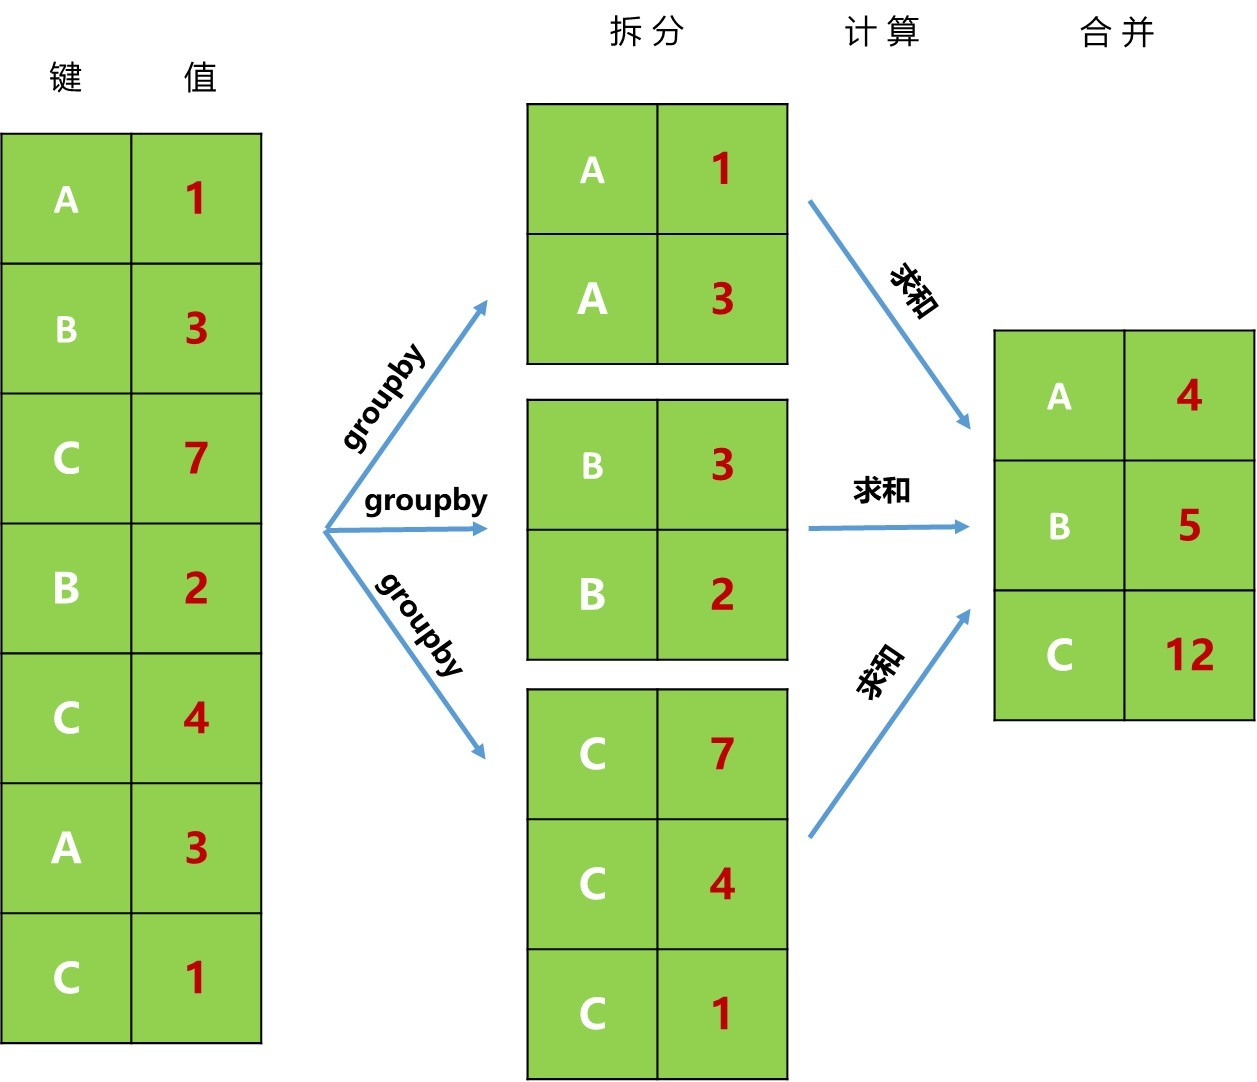

In [22]:
# 定义数据集
df = pd.DataFrame({"name":["A", "B", "C", "B", "C", "A", "C"], "value":[1, 3, 7, 2, 4, 3, 1]})
df.groupby("name")["value"].sum()

name
A     4
B     5
C    12
Name: value, dtype: int64

#### 分组迭代

In [23]:
grouped = df.groupby("name")
grouped

**方法一:查看Groupby对象**

In [24]:
for name, group in grouped:
    print(name)
    print(group)
    print("#################")

A
  name  value
0    A      1
5    A      3
#################
B
  name  value
1    B      3
3    B      2
#################
C
  name  value
2    C      7
4    C      4
6    C      1
#################


**方法二:查看Groupby对象**

In [28]:
trunk = dict(list(grouped))
trunk["A"]

,name,value
0,A,1
5,A,3


#### 计算分析

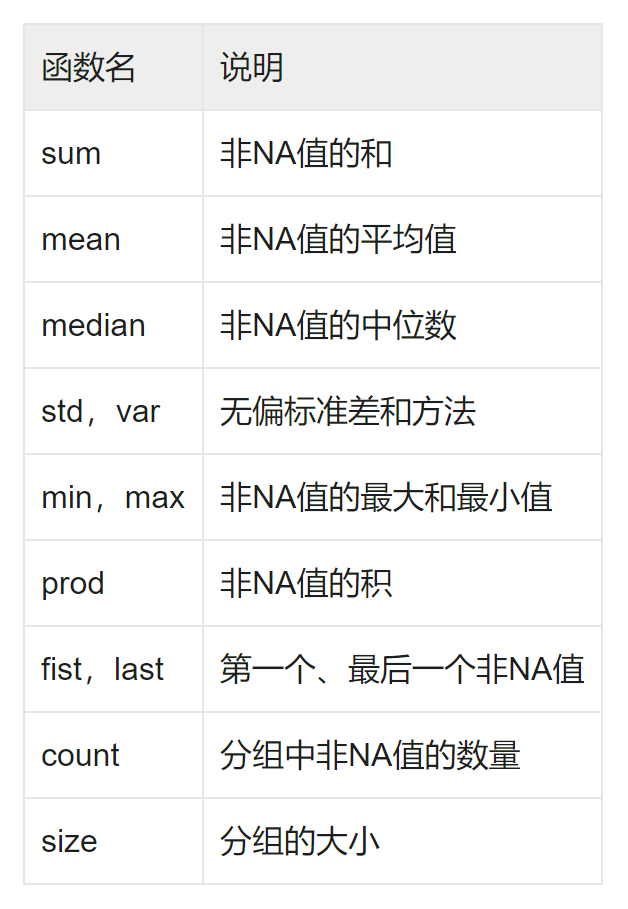

In [29]:
df.groupby("name")["value"].mean()

name
A    2.0
B    2.5
C    4.0
Name: value, dtype: float64

### 面向列的多函数方法

In [31]:
# 通过随机数生成介于50-99分之间的200×5的数据清单
frame = pd.DataFrame(np.random.randint(50, 99, size=(200,5)), 
                     columns=["math", "english", "music", "sports", "sing"])
# 随机生成200名学生的性别
frame["sex"] = np.random.choice(["femal", "male"], size=200, p=[0.45, 0.55])
# 随机生成200名学生的班级
frame["class"] = np.random.choice(["class1", "class2", "class3"], size=200, p=[0.35, 0.3, 0.35])

In [32]:
frame.head()

,math,english,music,sports,sing,sex,class
0,57,60,88,66,63,male,class2
1,98,68,51,65,95,male,class2
2,98,73,73,77,80,femal,class1
3,63,66,87,78,51,male,class2
4,73,75,51,57,59,femal,class3


In [36]:
# 需要注意的是，对上文提到的常用统计方法，函数名是以字符串的形式传入的
frame.groupby(["class","sex"])[["math", "english"]].agg(["max","min"])

math     english    
              max min     max min
class  sex                       
class1 femal   98  51      98  55
       male    98  51      97  50
class2 femal   97  51      94  50
       male    98  50      98  54
class3 femal   95  54      96  50
       male    98  51      98  50

In [37]:
# agg()函数也可以接纳自定义的函数名。例如这里我们定义一个最大分差的函数：
def max_gap(arr):
    return arr.max()-arr.min()

In [38]:
# 一次性查看全部科目的最高分、最低分、最大分差
# 注意：这里传入函数名，需要与字符串传递的方式区分开来
frame.groupby(["class", "sex"]).agg(["max", "min", max_gap])

math             english             music             sports  \
              max min max_gap     max min max_gap   max min max_gap    max   
class  sex                                                                   
class1 femal   98  51      47      98  55      43    97  51      46     98   
       male    98  51      47      97  50      47    98  55      43     97   
class2 femal   97  51      46      94  50      44    91  50      41     98   
       male    98  50      48      98  54      44    98  51      47     96   
class3 femal   95  54      41      96  50      46    96  51      45     98   
       male    98  51      47      98  50      48    98  51      47     98   

                         sing              
             min max_gap  max min max_gap  
class  sex                                 
class1 femal  50      48   98  50      48  
       male   51      46   97  50      47  
class2 femal  51      47   98  51      47  
       male   50      46   95  50      45  
class3 femal  50      48   98  55      43  
       male   50      48   98  50      48

In [39]:
frame.groupby(["class", "sex"])[["math", "sing"]].agg({"math":"max", "sing":max_gap})

math  sing
class  sex              
class1 femal    98    48
       male     98    47
class2 femal    97    47
       male     98    45
class3 femal    95    43
       male     98    48

### apply：更具一般性的自定义聚合方法

#### 常规用法

In [40]:
# 定义top函数，可以查看xx科目的最高分，并返回最高分的学生的全部成绩
# n 表示选择TOP n
def top(grade, n=1, subject="math"):
    return grade.sort_values(by=subject, ascending=False)[:n]
# 查看 数学最高分的学生的全部成绩
frame.groupby(["class", "sex"]).apply(top, 1, "math")

math  english  music  sports  sing    sex   class
class  sex                                                        
class1 femal 2     98       73     73      77    80  femal  class1
       male  57    98       62     87      85    50   male  class1
class2 femal 63    97       70     84      97    88  femal  class2
       male  1     98       68     51      65    95   male  class2
class3 femal 6     95       75     79      97    92  femal  class3
       male  49    98       71     63      69    97   male  class3

In [41]:
frame.groupby(["class", "sex"]).apply(top, 3, "english")

math  english  music  sports  sing    sex   class
class  sex                                                         
class1 femal 12     96       98     94      86    66  femal  class1
             146    62       97     59      75    88  femal  class1
             103    94       96     97      61    86  femal  class1
       male  108    78       97     98      97    80   male  class1
             100    67       94     60      90    65   male  class1
             47     66       91     81      95    90   male  class1
class2 femal 61     82       94     51      95    70  femal  class2
             94     54       91     55      82    52  femal  class2
             104    93       91     71      53    67  femal  class2
       male  86     90       98     91      92    61   male  class2
             28     68       98     52      80    50   male  class2
             93     89       96     64      96    83   male  class2
class3 femal 172    77       96     81      51    93  femal  class3
             105    91       92     92      81    97  femal  class3
             74     65       92     86      89    93  femal  class3
       male  150    94       98     86      58    64   male  class3
             158    51       97     69      94    52   male  class3
             51     57       94     59      71    98   male  class3

#### 高级用法

In [42]:
def rule(group):
    _max = group.max()
    _min = group.min()
    return {"max": _max, "min": _min, "gap": _max-_min}
# 注意，这里需要用unstak方法，把堆叠格式的数据转换成表格形式
frame.groupby(["class", "sex"])["math"].apply(rule).unstack()

max  min  gap
class  sex                 
class1 femal   98   51   47
       male    98   51   47
class2 femal   97   51   46
       male    98   50   48
class3 femal   95   54   41
       male    98   51   47

#### 案例分析一

In [43]:
data = pd.DataFrame(np.random.randn(12), index=["A", "B", "c"]*4)
data.iloc[1] = np.nan
data.iloc[5] = np.nan
data.iloc[10] = np.nan

In [44]:
# 按照分组的均值进行填充
# group_keys用来禁止显示分组键
data.groupby(data.index, group_keys=False).apply(lambda g:g.fillna(g.mean()))

,0
A,-0.966653
A,0.123747
A,-0.289759
A,-0.370336
B,0.485942
B,1.661449
B,-0.689565
B,0.485942
c,0.083756
c,0.312287
